In [ ]:
!pip install libsvmdata
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from libsvmdata import fetch_libsvm
X, y = fetch_libsvm("diabetes_scale")

file_sizes: 100%|███████████████████████████| 68.6k/68.6k [00:00<00:00, 652kB/s]


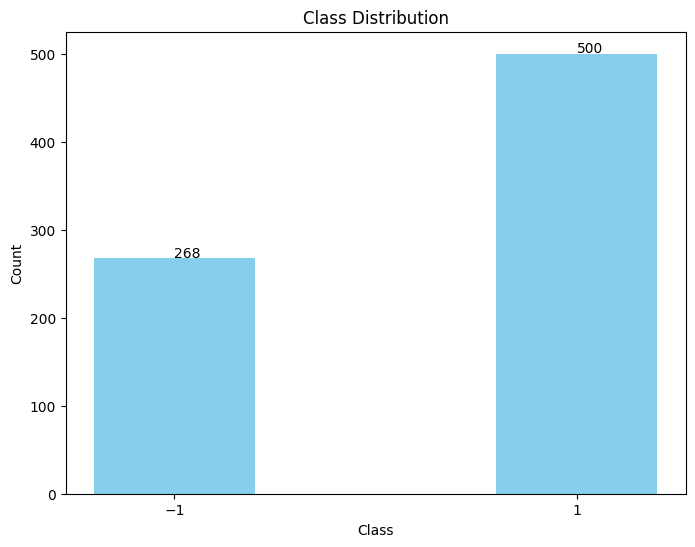

In [ ]:
a, b = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 6))

plt.bar(a, b, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(a)
bars = plt.bar(a,b, color='skyblue')
for bar, count in zip(bars, b):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, str(count), fontsize=10)
plt.show()

Training

In [ ]:
from sklearn.model_selection import train_test_split #70,15,15
X_train, X_1, y_train, y_1 = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_1,y_1, test_size = 0.5, random_state = 42)

In [ ]:
def initialize_weights_and_bias(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

In [ ]:
def train_perceptron(X, y, learning_rate=0.1, n_iterations=100):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights_and_bias(n_features)

    for _ in range(n_iterations):
        for i in range(n_samples):
            weighted_sum = np.dot(X[i], weights) + bias
            y_predicted = np.where(weighted_sum > 0, 1, -1)
            weights += learning_rate * (y[i] - y_predicted) * X[i]
            bias += learning_rate * (y[i] - y_predicted)

    return weights, bias

In [ ]:
def predict_perceptron(X, weights, bias):
    weighted_sum = np.dot(X, weights) + bias
    y_predicted = np.where(weighted_sum > 0, 1, -1)
    return y_predicted

In [ ]:
weights, bias = train_perceptron(X_train, y_train)
y_pred = predict_perceptron(X_val, weights, bias)

print(f"Accuracy: { accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred, pos_label=1)}")
print(f"Recall: {recall_score(y_val, y_pred, pos_label=1)}")
print(f"F1-score: {f1_score(y_val, y_pred, pos_label=1)}")

Accuracy: 0.7652173913043478
Precision: 0.8072289156626506
Recall: 0.8589743589743589
F1-score: 0.8322981366459627


Tunning parameters

In [ ]:
epochs = [20, 50, 100, 200, 500]

best_max_epochs = None
best_accuracy = 0.0

for epoch in epochs:
    weights, bias = train_perceptron(X_train, y_train, n_iterations=epoch)
    y_pred = [predict_perceptron(sample, weights, bias) for sample in X_val]
    accuracy = accuracy_score(y_val, y_pred)
    print(f"The number of epochs: {epoch} with the accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_epochs = epoch

print(f"Best epochs: {best_max_epochs}")
print(f"Best accuracy: {best_accuracy}")

The number of epochs: 20 with the accuracy: 0.7043478260869566
The number of epochs: 50 with the accuracy: 0.782608695652174
The number of epochs: 100 with the accuracy: 0.7652173913043478
The number of epochs: 200 with the accuracy: 0.7739130434782608
The number of epochs: 500 with the accuracy: 0.782608695652174
Best epochs: 50
Best accuracy: 0.782608695652174


In [ ]:
# Make predictions
y_pred = predict_perceptron(X_test, weights, bias)

print(f"Accuracy: { accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1)}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
print(f"F1-score: {f1_score(y_test, y_pred, pos_label=1)}")

Accuracy: 0.7327586206896551
Precision: 0.7916666666666666
Recall: 0.7808219178082192
F1-score: 0.7862068965517242


Training with seed = 0

In [ ]:
from sklearn.model_selection import train_test_split #70,15,15
X_train, X_1, y_train, y_1 = train_test_split(X,y, test_size = 0.3, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_1,y_1, test_size = 0.5, random_state = 0)

In [ ]:
weights, bias = train_perceptron(X_train, y_train)
y_pred = predict_perceptron(X_test, weights, bias)

print(f"Accuracy: { accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1)}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
print(f"F1-score: {f1_score(y_test, y_pred, pos_label=1)}")

Accuracy: 0.8189655172413793
Precision: 0.8315789473684211
Recall: 0.9404761904761905
F1-score: 0.88268156424581


In [ ]:
epochs = [20, 50, 100, 200, 500]

best_max_epochs = None
best_accuracy = 0.0

for epoch in epochs:
    weights, bias = train_perceptron(X_train, y_train, n_iterations=epoch)
    y_pred = [predict_perceptron(sample, weights, bias) for sample in X_val]
    accuracy = accuracy_score(y_val, y_pred)
    print(f"The number of epochs: {epoch} with the accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_epochs = epoch

print(f"Best epochs: {best_max_epochs}")
print(f"Best accuracy: {best_accuracy}")

The number of epochs: 20 with the accuracy: 0.7478260869565218
The number of epochs: 50 with the accuracy: 0.7217391304347827
The number of epochs: 100 with the accuracy: 0.7391304347826086
The number of epochs: 200 with the accuracy: 0.6869565217391305
The number of epochs: 500 with the accuracy: 0.7304347826086957
Best epochs: 20
Best accuracy: 0.7478260869565218


In [ ]:
weights, bias = train_perceptron(X_train, y_train, learning_rate=0.1, n_iterations=20)
y_pred = predict_perceptron(X_test, weights, bias)

print(f"Accuracy: { accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1)}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
print(f"F1-score: {f1_score(y_test, y_pred, pos_label=1)}")

Accuracy: 0.8362068965517241
Precision: 0.8494623655913979
Recall: 0.9404761904761905
F1-score: 0.8926553672316385


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.78      0.56      0.65        32
         1.0       0.85      0.94      0.89        84

    accuracy                           0.84       116
   macro avg       0.82      0.75      0.77       116
weighted avg       0.83      0.84      0.83       116



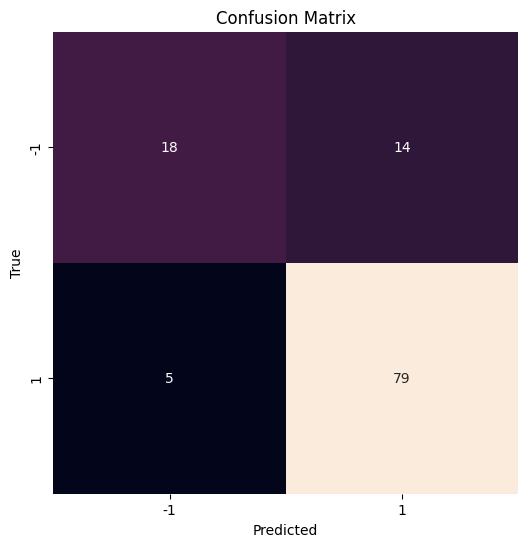

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cbar=False,
            xticklabels=['-1', '1'],
            yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()